In [52]:
%matplotlib inline 
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers

import pandas

from pandas_datareader import data as pdr
from pandas.plotting import lag_plot

from pandas.plotting import autocorrelation_plot

import statsmodels


df_amzn = pandas.read_excel('amzn.xlsx')

close_amzn = df_amzn['Close']


Epoch 1/50
 - 1s - loss: 0.0151
Epoch 2/50
 - 0s - loss: 0.0012
Epoch 3/50
 - 0s - loss: 2.1551e-04
Epoch 4/50
 - 0s - loss: 1.3568e-04
Epoch 5/50
 - 0s - loss: 9.5236e-05
Epoch 6/50
 - 0s - loss: 9.4031e-05
Epoch 7/50
 - 0s - loss: 8.9590e-05
Epoch 8/50
 - 0s - loss: 9.4969e-05
Epoch 9/50
 - 0s - loss: 8.5457e-05
Epoch 10/50
 - 0s - loss: 8.2894e-05
Epoch 11/50
 - 0s - loss: 9.3663e-05
Epoch 12/50
 - 0s - loss: 8.7816e-05
Epoch 13/50
 - 0s - loss: 8.4152e-05
Epoch 14/50
 - 0s - loss: 1.0024e-04
Epoch 15/50
 - 0s - loss: 8.1943e-05
Epoch 16/50
 - 0s - loss: 8.2701e-05
Epoch 17/50
 - 0s - loss: 9.0500e-05
Epoch 18/50
 - 0s - loss: 8.9169e-05
Epoch 19/50
 - 0s - loss: 9.5323e-05
Epoch 20/50
 - 0s - loss: 8.1161e-05
Epoch 21/50
 - 0s - loss: 6.8400e-05
Epoch 22/50
 - 0s - loss: 7.1510e-05
Epoch 23/50
 - 0s - loss: 6.6244e-05
Epoch 24/50
 - 0s - loss: 6.0901e-05
Epoch 25/50
 - 0s - loss: 5.7503e-05
Epoch 26/50
 - 0s - loss: 7.0441e-05
Epoch 27/50
 - 0s - loss: 6.4384e-05
Epoch 28/50
 - 0s 

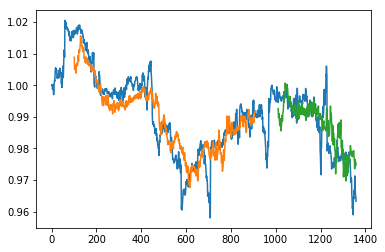

In [53]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)

sigma=0.
full_len = len(close_amzn)

y = close_amzn/(close_amzn.cumsum()/numpy.ones(len(close_amzn)).cumsum())

dataset =  y.values.reshape((full_len, 1))
dataset = dataset.astype('float32') 

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(30, input_dim=look_back, activation='tanh' ))
model.add(Dense(30, activation='tanh'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=40, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()